# Pandas

With Pandas (= panel data), tabular data can be handled very conveniently. More at https://pandas.pydata.org/.

Very helpful:
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Pandas uses two important data structures:
- `Series` are 1-dimensional arrays. In contrast to Numpy arrays, however, they have an additional index that can be used to conveniently access entries. Internally, this is based on Numpy arrays.
- `DataFrame` is an entire table consisting of several series (=columns) of the same length.

In [54]:
import numpy as np
import pandas as pd # empfehlenswerte Konvention

#### DataFrames

To manually store data in table we need to create DataFrame
- dictionary keys will be used as headers
- values in list as columns 
of the DataFrame

In [55]:
df = pd.DataFrame(
    {
        "Name": ["Alex","Martin","Den"],
        "Age": [28,22,35],
        "Sex": ["Female","Male","Male"]
    }
)
df

,Name,Age,Sex
0,Alex,28,Female
1,Martin,22,Male
2,Den,35,Male


Every column is a `Series`.

In [56]:
df["Age"]
# as we can see with type method is is Series
type(df["Age"])

pandas.core.series.Series

The first column of a DataFrame (or series) is the so-called index. It contains the *row names*. By default, these are the numbers 0, 1, 2, ...
However, you can also set a different index.

In [57]:
# index method returns start and stop indexes with step properties
df.index
# we can name the index
df = df.set_index("Name")
df



,Age,Sex
Name,,
Alex,28,Female
Martin,22,Male
Den,35,Male


We can create Series from scratch as well. Note that Series do not have column labels but they do have row labels

In [58]:
ages = pd.Series([19,22,34], name="Age")
ages
# This is the way to add row labels
ages.index = ["person1","person2","person3"]
ages

person1    19
person2    22
person3    34
Name: Age, dtype: int64

We can also create a series explicitly. If you don't specify an index, it will be the numbers 0, 1, 2, ...

In [59]:
dummy = pd.Series(np.random.standard_normal(4), index=["a","c","d","e"])
dummy


a   -0.240030
c   -0.177809
d    0.144625
e   -1.665042
dtype: float64

#### Read and write data

Pandas offers a variety of options for reading data from databases (via SQL) or from files, e.g. csv, xlsx, parquet, arrow, feather, ...

In [60]:
star_wars = pd.read_csv("starwars.csv")
star_wars

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
2,Darth Vader,202,136.0,male,yellow,Tatooine,True
3,Leia Organa,150,49.0,female,brown,Alderaan,True
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False
5,Yoda,66,17.0,male,brown,NaN,True
6,Boba Fett,183,78.2,male,brown,Kamino,False


Gain initial insight into the data.
- I wanna see first 3 rows of a DataFrame: use the head() method with the required number of rows (in this case 3) as argument.
- If we are interested technical summary of a DataFrame we call info method on our DataFrame

In [61]:
star_wars.head(3)
star_wars.info()
star_wars.shape
star_wars.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       7 non-null      object 
 1   height     7 non-null      int64  
 2   mass       7 non-null      float64
 3   sex        7 non-null      object 
 4   eye_color  7 non-null      object 
 5   homeworld  6 non-null      object 
 6   jedi       7 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 524.0+ bytes


,height,mass
count,7.000000,7.000000
mean,156.714286,71.600000
std,57.760177,42.646454
min,66.000000,17.000000
25%,123.000000,40.500000
50%,172.000000,77.000000
75%,192.500000,95.100000
max,228.000000,136.000000


Reading and writing xlsx files is also no problem. Here is an example of saving and reading the data set as xlsx. The *openpyxl* package must be installed for this.

In [62]:
star_wars.to_excel("starwars.xlsx", sheet_name="some heros", index=False)


#### Selection of columns or rows

If you select not just one column name but a list of several columns, you get a DataFrame.

In [63]:
star_wars[["name", "height"]]

,name,height
0,Luke Skywalker,172
1,R2-D2,96
2,Darth Vader,202
3,Leia Organa,150
4,Chewbacca,228
5,Yoda,66
6,Boba Fett,183


When selecting rows, you usually want to select rows that fulfill certain properties.
To do this, write a true/false vector of the length of the DataFrame in the square brackets `[]`.
Comparison operators (`<`, `>`, `==`, `<=`, `>=`, `!=`) and Boolean operators `&` (and), `|` (or) and `~` (not) are often very helpful.

In [64]:
star_wars[star_wars["height"] < 100]

,name,height,mass,sex,eye_color,homeworld,jedi
1,R2-D2,96,32.0,none,red,Naboo,False
5,Yoda,66,17.0,male,brown,NaN,True


In [65]:
# this will give true and false vector of the length of the data frame
star_wars["height"] < 100

0    False
1     True
2    False
3    False
4    False
5     True
6    False
Name: height, dtype: bool

In [66]:
# we can also use multiple boolean opeartaror with
star_wars[(star_wars["height"] < 180) & (star_wars["sex"] == "male")]

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
5,Yoda,66,17.0,male,brown,NaN,True


In [67]:
# isin method is clearer that using (starwars["eye_color"] == "red") | (starwars["eye_color"] == "blue")
star_wars[star_wars["eye_color"].isin(["red", "blue"])]

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False


In [68]:
# Selection of missing values using .isna()
star_wars[star_wars["homeworld"].isna()]

,name,height,mass,sex,eye_color,homeworld,jedi
5,Yoda,66,17.0,male,brown,NaN,True


In [69]:
# Selection of missing values using  .notna()
star_wars[star_wars["homeworld"].notna()]

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
2,Darth Vader,202,136.0,male,yellow,Tatooine,True
3,Leia Organa,150,49.0,female,brown,Alderaan,True
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False
6,Boba Fett,183,78.2,male,brown,Kamino,False


If you want to select certain rows and columns *in one step*, `.loc` and `.iloc` are suitable.

In [70]:
# below code will print out selected boolean which height is less than 100 and jts corresponding name
star_wars.loc[star_wars["height"] < 100, "name"]

1    R2-D2
5     Yoda
Name: name, dtype: object

Using `.iloc[rows, columns]` (= integer location), you can select entries via their row/column number, i.e. via the position and not via the name. (Slicing works as usual here).

In [71]:
star_wars.iloc[0:2,[2,4]]


,mass,eye_color
0,77.0,blue
1,32.0,red


In [78]:
star_wars



,height,mass,sex,eye_color,homeworld,jedi
name,,,,,,
Luke Skywalker,172,77.0,male,blue,Tatooine,True
R2-D2,96,32.0,none,red,Naboo,False
Darth Vader,202,136.0,male,yellow,Tatooine,True
Leia Organa,150,49.0,female,brown,Alderaan,True
Chewbacca,228,112.0,male,blue,Kashyyyk,False
Yoda,66,17.0,male,brown,NaN,True
Boba Fett,183,78.2,male,brown,Kamino,False


In [80]:
star_wars.loc["Yoda"]

height          66
mass          17.0
sex           male
eye_color    brown
homeworld      NaN
jedi          True
Name: Yoda, dtype: object

In [83]:
# : indicates all rows
star_wars.loc[:, "height"]

name
Luke Skywalker    172
R2-D2              96
Darth Vader       202
Leia Organa       150
Chewbacca         228
Yoda               66
Boba Fett         183
Name: height, dtype: int64

In [85]:
# attention here loc slicing inclusive which means it includes mass to height
star_wars.loc["R2-D2":"Chewbacca", ["mass", "height"]]

,mass,height
name,,
R2-D2,32.0,96
Darth Vader,136.0,202
Leia Organa,49.0,150
Chewbacca,112.0,228


In [86]:
star_wars = star_wars.reset_index()
star_wars

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
2,Darth Vader,202,136.0,male,yellow,Tatooine,True
3,Leia Organa,150,49.0,female,brown,Alderaan,True
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False
5,Yoda,66,17.0,male,brown,NaN,True
6,Boba Fett,183,78.2,male,brown,Kamino,False


#### Create, remove and rename columns

When calculating new columns, the power of vectorization becomes clear.
The calculations are performed element by element for each entry of the vector.
An explicit loop is not necessary.

In [87]:
star_wars["BMI"] = star_wars["mass"] / (star_wars["height"] / 100)**2
star_wars

,name,height,mass,sex,eye_color,homeworld,jedi,BMI
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091
5,Yoda,66,17.0,male,brown,NaN,True,39.026630
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951


In [89]:
star_wars["col1"] = 1
star_wars

,name,height,mass,sex,eye_color,homeworld,jedi,BMI,col1
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1
5,Yoda,66,17.0,male,brown,NaN,True,39.026630,1
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1


In [90]:
star_wars["col2"] = np.random.randint(0,100, star_wars.shape[0])
star_wars

,name,height,mass,sex,eye_color,homeworld,jedi,BMI,col1,col2
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1,61
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1,97
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1,33
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1,61
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1,63
5,Yoda,66,17.0,male,brown,NaN,True,39.026630,1,5
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1,65


If you want to perform complicated calculations, you can write a function and apply it line by line using `map()` or `apply()`. 
line by line. More on this later! 

To rename columns, pass a dictionary with entries of the form `{"old_colname": "new_colname"}` or a suitable string function to the `.rename` function.

In [91]:
star_wars_renamed = star_wars.rename(columns= {"eye_color":"Augenfarbe","sex":"Geschlecht"})
star_wars_renamed

,name,height,mass,Geschlecht,Augenfarbe,homeworld,jedi,BMI,col1,col2
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1,61
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1,97
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1,33
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1,61
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1,63
5,Yoda,66,17.0,male,brown,NaN,True,39.026630,1,5
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1,65


#### Visualization

(Here only very briefly. Visualization gets an extra session).

In [92]:
import matplotlib.pyplot as plt

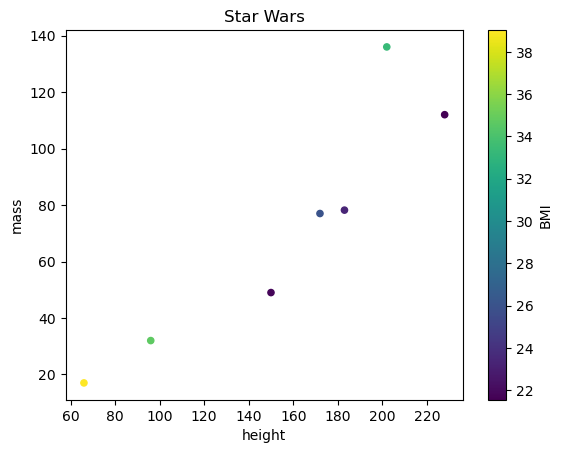

In [93]:
ax = star_wars.plot.scatter(x="height", y="mass",c="BMI", colormap="viridis", title="Star Wars")

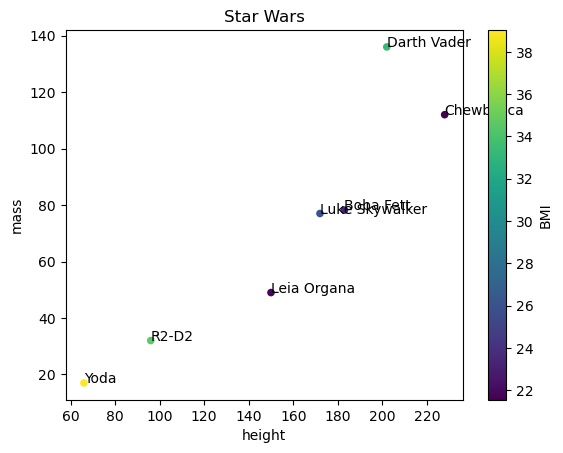

In [97]:
ax = star_wars.plot.scatter(x="height", y="mass",c="BMI", colormap="viridis", title="Star Wars")
for idx,row in star_wars.iterrows():
    ax.annotate(row["name"], (row["height"], row["mass"]))
plt.show()

#### Sorting

In [98]:
star_wars.sort_values(by = "height")

,name,height,mass,sex,eye_color,homeworld,jedi,BMI,col1,col2
5,Yoda,66,17.0,male,brown,NaN,True,39.026630,1,5
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1,97
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1,61
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1,61
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1,65
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1,33
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1,63


In [99]:
star_wars.sort_values(by="height", ascending=False)

,name,height,mass,sex,eye_color,homeworld,jedi,BMI,col1,col2
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1,63
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1,33
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1,65
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1,61
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1,61
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1,97
5,Yoda,66,17.0,male,brown,NaN,True,39.026630,1,5


In [100]:
star_wars.sort_values(by=["jedi", "height"], ascending=[True,False])

,name,height,mass,sex,eye_color,homeworld,jedi,BMI,col1,col2
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1,63
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1,65
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1,97
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1,33
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1,61
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1,61
5,Yoda,66,17.0,male,brown,NaN,True,39.026630,1,5


Sorting the dataframe has consequences for the index. 
If you also want the index to be ordered, you can either reset the index or have it ignored directly during sorting. 

In [102]:
#this way our sorted data will have sorted index as well
star_wars.sort_values("height").reset_index(drop=True)

,name,height,mass,sex,eye_color,homeworld,jedi,BMI,col1,col2
0,Yoda,66,17.0,male,brown,NaN,True,39.026630,1,5
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1,97
2,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1,61
3,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1,61
4,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1,65
5,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1,33
6,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1,63


In [103]:
star_wars.sort_values("height", ignore_index=True)

,name,height,mass,sex,eye_color,homeworld,jedi,BMI,col1,col2
0,Yoda,66,17.0,male,brown,NaN,True,39.026630,1,5
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222,1,97
2,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778,1,61
3,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582,1,61
4,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951,1,65
5,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066,1,33
6,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091,1,63


#### Aggregation of data

Typical aggregation functions such as mean(), sum(), max(), quantile() ... can be called directly as a method of `Series`.

In [104]:
star_wars["mass"].mean()

71.6

In [107]:
star_wars[["BMI", "mass"]].median()

BMI     26.027582
mass    77.000000
dtype: float64

Very often you want to perform such aggregations in groups, i.e. for each unique value of a feature. This is known as **Split-Apply-Combine**: The overall table is split into individual tables according to the unique values of a feature, the aggregation function is calculated for each such table and then these values are collected in a smaller table.

In [108]:

star_wars[["jedi","mass"]].groupby("jedi").sum()

,mass
jedi,
False,222.2
True,279.0


In [109]:
star_wars.groupby("jedi")["mass"].mean()

jedi
False    74.066667
True     69.750000
Name: mass, dtype: float64

In [110]:
star_wars.groupby("jedi")[["BMI", "mass"]].sum()

,BMI,mass
jedi,,
False,79.618264,222.2
True,120.162056,279.0


In [111]:
star_wars.groupby("jedi").sum(numeric_only=True)

,height,mass,BMI,col1,col2
jedi,,,,,
False,507,222.2,79.618264,3,225
True,590,279.0,120.162056,4,160


We have just used a square bracket with column names directly after `.groupby()`. This is often done and restricts the individual tables to the named columns. The aggregation function then only affects these columns.

You can also group by several characteristics. The resulting object then has a MultiIndex.

In [112]:
star_wars.groupby(["jedi","sex"])["mass"].mean()

jedi   sex   
False  male      95.100000
       none      32.000000
True   female    49.000000
       male      76.666667
Name: mass, dtype: float64

In [114]:
star_wars.groupby(["jedi","sex"]).mean(numeric_only=True)

height       mass        BMI  col1  col2
jedi  sex                                                 
False male    205.500000  95.100000  22.448021   1.0  64.0
      none     96.000000  32.000000  34.722222   1.0  97.0
True  female  150.000000  49.000000  21.777778   1.0  61.0
      male    146.666667  76.666667  32.794759   1.0  33.0

Very often you want to count how often a value occurs in a column. This provides the basis for bar charts.
(Note: By default, NA values do not form a separate group and are not listed. However, this is often relevant in the context of data preparation. For this purpose, you can set the option `dropna=False` in `.groupby()` or `.value_counts()`).
As the resulting object is not a DataFrame, a `.reset_index()` is suitable for making the index an explicit column and connecting sorting steps, for example.

In [115]:
star_wars.groupby("sex").size().reset_index()

,sex,0
0,female,1
1,male,5
2,none,1


In [116]:
star_wars["sex"].value_counts()

sex
male      5
none      1
female    1
Name: count, dtype: int64

There are both `.count()` and `.size()`. These are very similar. While `.size()` returns the number of rows, `.count()` returns the number of non-NA values. One function therefore counts NA values, while the other does not.

#### Merging (=joining) several tables

Very often you want to combine several tables to enrich information.
Pandas can also be used to combine several DataFrames, as in SQL.

The following table shows the development of student numbers for the TH Aschaffenburg.
Unfortunately, only the course abbreviations are included and there is also no assignment to faculties.
The second table provides this information.

In [117]:
students = pd.read_csv("TH-Aschaffenburg.csv")
students.head()

,year,degree program,freshmen,students
0,WS 02/03,BW,112.0,430
1,WS 02/03,BWR,57.0,230
2,WS 02/03,EIT,50.0,178
3,WS 02/03,M,44.0,44
4,WS 02/03,WI,69.0,183


In [118]:
names_of_programs = pd.read_csv("TH-Aschaffenburg_degree_programs.csv")
names_of_programs.head()

,short name,full name,faculty
0,BW,Betriebswirtschaft,WR
1,BW KMU,Betriebswirtschaft für KMU,WR
2,BWR,Betriebswirtschaft und Recht,WR
3,DIM,Digitales Immobilienmanagement,WR
4,IIM,Internationales Immobilienmanagement,WR


Using `merge()` you can perform all kinds of JOIN operations in Pandas, as we know them from SQL.
Here we want to enrich the table *th_small* with the respective degree program information.

In [119]:
merged_data = pd.merge(left=students, right = names_of_programs, how="left",left_on="degree program", right_on="short name")
merged_data

,year,degree program,freshmen,students,short name,full name,faculty
0,WS 02/03,BW,112.0,430,BW,Betriebswirtschaft,WR
1,WS 02/03,BWR,57.0,230,BWR,Betriebswirtschaft und Recht,WR
2,WS 02/03,EIT,50.0,178,EIT,Elektro- und Informationstechnik,IW
3,WS 02/03,M,44.0,44,M,Mechatronik,IW
4,WS 02/03,WI,69.0,183,WI,Wirtschaftsingenieurwesen,IW
...,...,...,...,...,...,...,...
283,WS 23/24,SDI,16.0,16,SDI,Software Design International,IW
284,WS 23/24,WI,68.0,187,WI,Wirtschaftsingenieurwesen,IW
285,WS 23/24,WI (berufsb),6.0,52,WI (berufsb),Wirtschaftsingenieurwesen (berufsbegl.),IW
286,WS 23/24,WIMAT,NaN,16,WIMAT,Wirtschaftsingenieurwesen/Materialtechnologien,IW


With `merge()` you can also perform other joins (RIGHT JOIN, INNER JOIN, OUTER JOIN), for example by specifying `how="outer"`.

The easiest way to combine two DataFrames is to simply append one to the other.
Of course, this only makes sense if the columns match (or are at least subsets of each other).
For example, let's look at the data for the degree programs *MEDS* and *SD*.
With `concat()`, the two tables can be appended.

In [120]:
df_1 = students[students["degree program"] == "MEDS"]
df_1


,year,degree program,freshmen,students
184,WS 19/20,MEDS,48.0,48
204,WS 20/21,MEDS,31.0,56
225,WS 21/22,MEDS,20.0,63
249,WS 22/23,MEDS,19.0,78
274,WS 23/24,MEDS,30.0,83


In [121]:
df_2 = students[students["degree program"] == "SD"]
df_2

,year,degree program,freshmen,students
210,WS 20/21,SD,55.0,55
232,WS 21/22,SD,52.0,90
257,WS 22/23,SD,64.0,138
282,WS 23/24,SD,72.0,183


In [122]:
pd.concat([df_1,df_2])

,year,degree program,freshmen,students
184,WS 19/20,MEDS,48.0,48
204,WS 20/21,MEDS,31.0,56
225,WS 21/22,MEDS,20.0,63
249,WS 22/23,MEDS,19.0,78
274,WS 23/24,MEDS,30.0,83
210,WS 20/21,SD,55.0,55
232,WS 21/22,SD,52.0,90
257,WS 22/23,SD,64.0,138
282,WS 23/24,SD,72.0,183


#### Data wrangling for advanced users: Long format and wide format

<!--- Data source:
- Destatis, Table 12411-0015: Population: districts, reference date (selection: all reference dates). (Download flat file!)
- Destatis, Table 12411-0018: Population: districts, reference date, sex, age groups (selection: all reference dates but only the 3 districts of Aschaffenburg, Würzburg and Schweinfurt). (Download Flat-File!) -->

There are various ways of displaying the same data in tabular form.
Depending on the application, it is necessary to switch between these forms. This is sometimes known as “pivoting”.
The best way to see this is with an example. 

<!--- The following table (adapted from Destatis table 12411-0016) shows the population development of the three cities Aschaffenburg, Schweinfurt and Würzburg.-->

For the sake of simplicity, we will initially disregard the total number of students and limit ourselves to the degree programs *BW* (Business Administration), *SD* (Software Design) and *EIT* (Electrical Engineering and Information Technology) since the winter semester 2020.

In [124]:
small = students[students["degree program"].isin(["BW","SD","EIT"]) & students["year"].isin(["WS 21/22", "WS 22/23", "WS 23/24"])].drop(columns="students").reset_index(drop=True)
small

,year,degree program,freshmen
0,WS 21/22,BW,113.0
1,WS 21/22,EIT,28.0
2,WS 21/22,SD,52.0
3,WS 22/23,BW,104.0
4,WS 22/23,EIT,34.0
5,WS 22/23,SD,64.0
6,WS 23/24,BW,124.0
7,WS 23/24,EIT,31.0
8,WS 23/24,SD,72.0


The table above contains one row for each combination of academic year and subject. 
This is called **long format**.
For time series in particular, however, it is often clearer to arrange the data differently.
In this case, we want to display the enrolment figures for each subject in a separate column.
This is then the **wide format**.

With the function `pivot()` you can “rotate” the fields appropriately.
Here you must specify which columns are to be retained as an index, which column contains the new column names and which are the actual values.
The wide format may seem clearer, but has the disadvantage that you have to change the table schema when new study programs are added.

In [125]:
small_wide = small.pivot(index="year", columns="degree program", values="freshmen")
small_wide

degree program,BW,EIT,SD
year,,,
WS 21/22,113.0,28.0,52.0
WS 22/23,104.0,34.0,64.0
WS 23/24,124.0,31.0,72.0


Of course, you can also convert from wide format to long format.
This works with `melt()`.
(First, however, we use `reset_index()` to make the index a regular column).
In the argument `id_vars` we list all columns that are to be kept constant - all other columns are "pivoted" to two new columns, in that each combination of column name and respective entry forms a new line. 

In [127]:
small_wide.reset_index().melt(id_vars="year")


,year,degree program,value
0,WS 21/22,BW,113.0
1,WS 22/23,BW,104.0
2,WS 23/24,BW,124.0
3,WS 21/22,EIT,28.0
4,WS 22/23,EIT,34.0
5,WS 23/24,EIT,31.0
6,WS 21/22,SD,52.0
7,WS 22/23,SD,64.0
8,WS 23/24,SD,72.0


We had just restricted the data set to the number of freshmen and removed the *students* column.
So we only let `pivot()` pivot the column *freshmen*.

If, on the other hand, we leave the student numbers in the data set, we can also pivot them.
This results in a **MultiIndex** for the columns.

In [129]:
small_2 = students[
    students["degree program"].isin(["BW", "SD", "EIT"])  & 
    students["year"].isin(["WS 21/22", "WS 22/23", "WS 23/24"])].reset_index(drop = True)
small_2

,year,degree program,freshmen,students
0,WS 21/22,BW,113.0,565
1,WS 21/22,EIT,28.0,124
2,WS 21/22,SD,52.0,90
3,WS 22/23,BW,104.0,531
4,WS 22/23,EIT,34.0,126
5,WS 22/23,SD,64.0,138
6,WS 23/24,BW,124.0,484
7,WS 23/24,EIT,31.0,110
8,WS 23/24,SD,72.0,183


In [130]:
small_2_wide = small_2.pivot(index= ["year"], columns="degree program", values=["freshmen","students"])
small_2_wide

freshmen             students              
degree program       BW   EIT    SD       BW    EIT     SD
year                                                      
WS 21/22          113.0  28.0  52.0    565.0  124.0   90.0
WS 22/23          104.0  34.0  64.0    531.0  126.0  138.0
WS 23/24          124.0  31.0  72.0    484.0  110.0  183.0

In [131]:
small_2_wide.columns

MultiIndex([('freshmen',  'BW'),
            ('freshmen', 'EIT'),
            ('freshmen',  'SD'),
            ('students',  'BW'),
            ('students', 'EIT'),
            ('students',  'SD')],
           names=[None, 'degree program'])

In [132]:
small_2_wide["freshmen"]

degree program,BW,EIT,SD
year,,,
WS 21/22,113.0,28.0,52.0
WS 22/23,104.0,34.0,64.0
WS 23/24,124.0,31.0,72.0


In [133]:
small_2_wide[("freshmen", "EIT")]

year
WS 21/22    28.0
WS 22/23    34.0
WS 23/24    31.0
Name: (freshmen, EIT), dtype: float64

Closely related to `pivot()` and `melt()` are the `stack()` and `unstack()` functions.
They are particularly useful in combination with indexes and MultiIndexes.

- `stack()` pivots all column labels (except the index) and returns a series (or a DataFrame) with an additional inner index level.
- `unstack()` pivots the innermost index level to column labels and thus creates a DataFrame.

For the sake of clarity, let's restrict ourselves to the beginner numbers above.

In [134]:
freshmen = small_2_wide["freshmen"]
freshmen

degree program,BW,EIT,SD
year,,,
WS 21/22,113.0,28.0,52.0
WS 22/23,104.0,34.0,64.0
WS 23/24,124.0,31.0,72.0


`stack()` rotates all column names to a new inner index level and thus returns a series with a two-level multi-index.

In [135]:
freshmen_stacked = freshmen.stack()
freshmen_stacked

year      degree program
WS 21/22  BW                113.0
          EIT                28.0
          SD                 52.0
WS 22/23  BW                104.0
          EIT                34.0
          SD                 64.0
WS 23/24  BW                124.0
          EIT                31.0
          SD                 72.0
dtype: float64

Using `unstack()`, the innermost level of a MultiIndex becomes new column names and we get the original DataFrame again.
(If you want to pivot another index level instead of the innermost level, you can specify an index level using both `stack` and `unstack`).

In [136]:
freshmen_stacked.unstack()

degree program,BW,EIT,SD
year,,,
WS 21/22,113.0,28.0,52.0
WS 22/23,104.0,34.0,64.0
WS 23/24,124.0,31.0,72.0


By the way: Instead of calling `pivot` you can also use `set_index` to create a MultiIndex and then call `unstack`.